# Credit Card Usage Clustering

## 1) Problem statement.
* This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
df=pd.read_csv("./data/credit_card.csv")

In [6]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.shape

(8950, 18)

In [8]:
# Display summary statistics for a dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


* It can be seen the few columns has the mean and median widely different from each other. It represents **outliers**

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

* **CUSTID** : Identification of Credit Card holder (Categorical)
* **BALANCE** : Balance amount left in their account to make purchases (
* **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
* **CASHADVANCE** : Cash in advance given by the user
* **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX** : Numbe of purchase transactions made
* **CREDITLIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user

In [11]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

In [14]:
print(f"we have {len(numeric_feature)} numeric features","\n", numeric_feature)

we have 17 numeric features 
 ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [16]:
print(f"we have {len(categorical_feature)} categorical features","\n", categorical_feature)

we have 1 categorical features 
 ['CUST_ID']


In [25]:
categorical_data=df.select_dtypes(include="object")
numerical_data=df.select_dtypes(exclude="object")

In [28]:
numerical_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [29]:
categorical_data

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


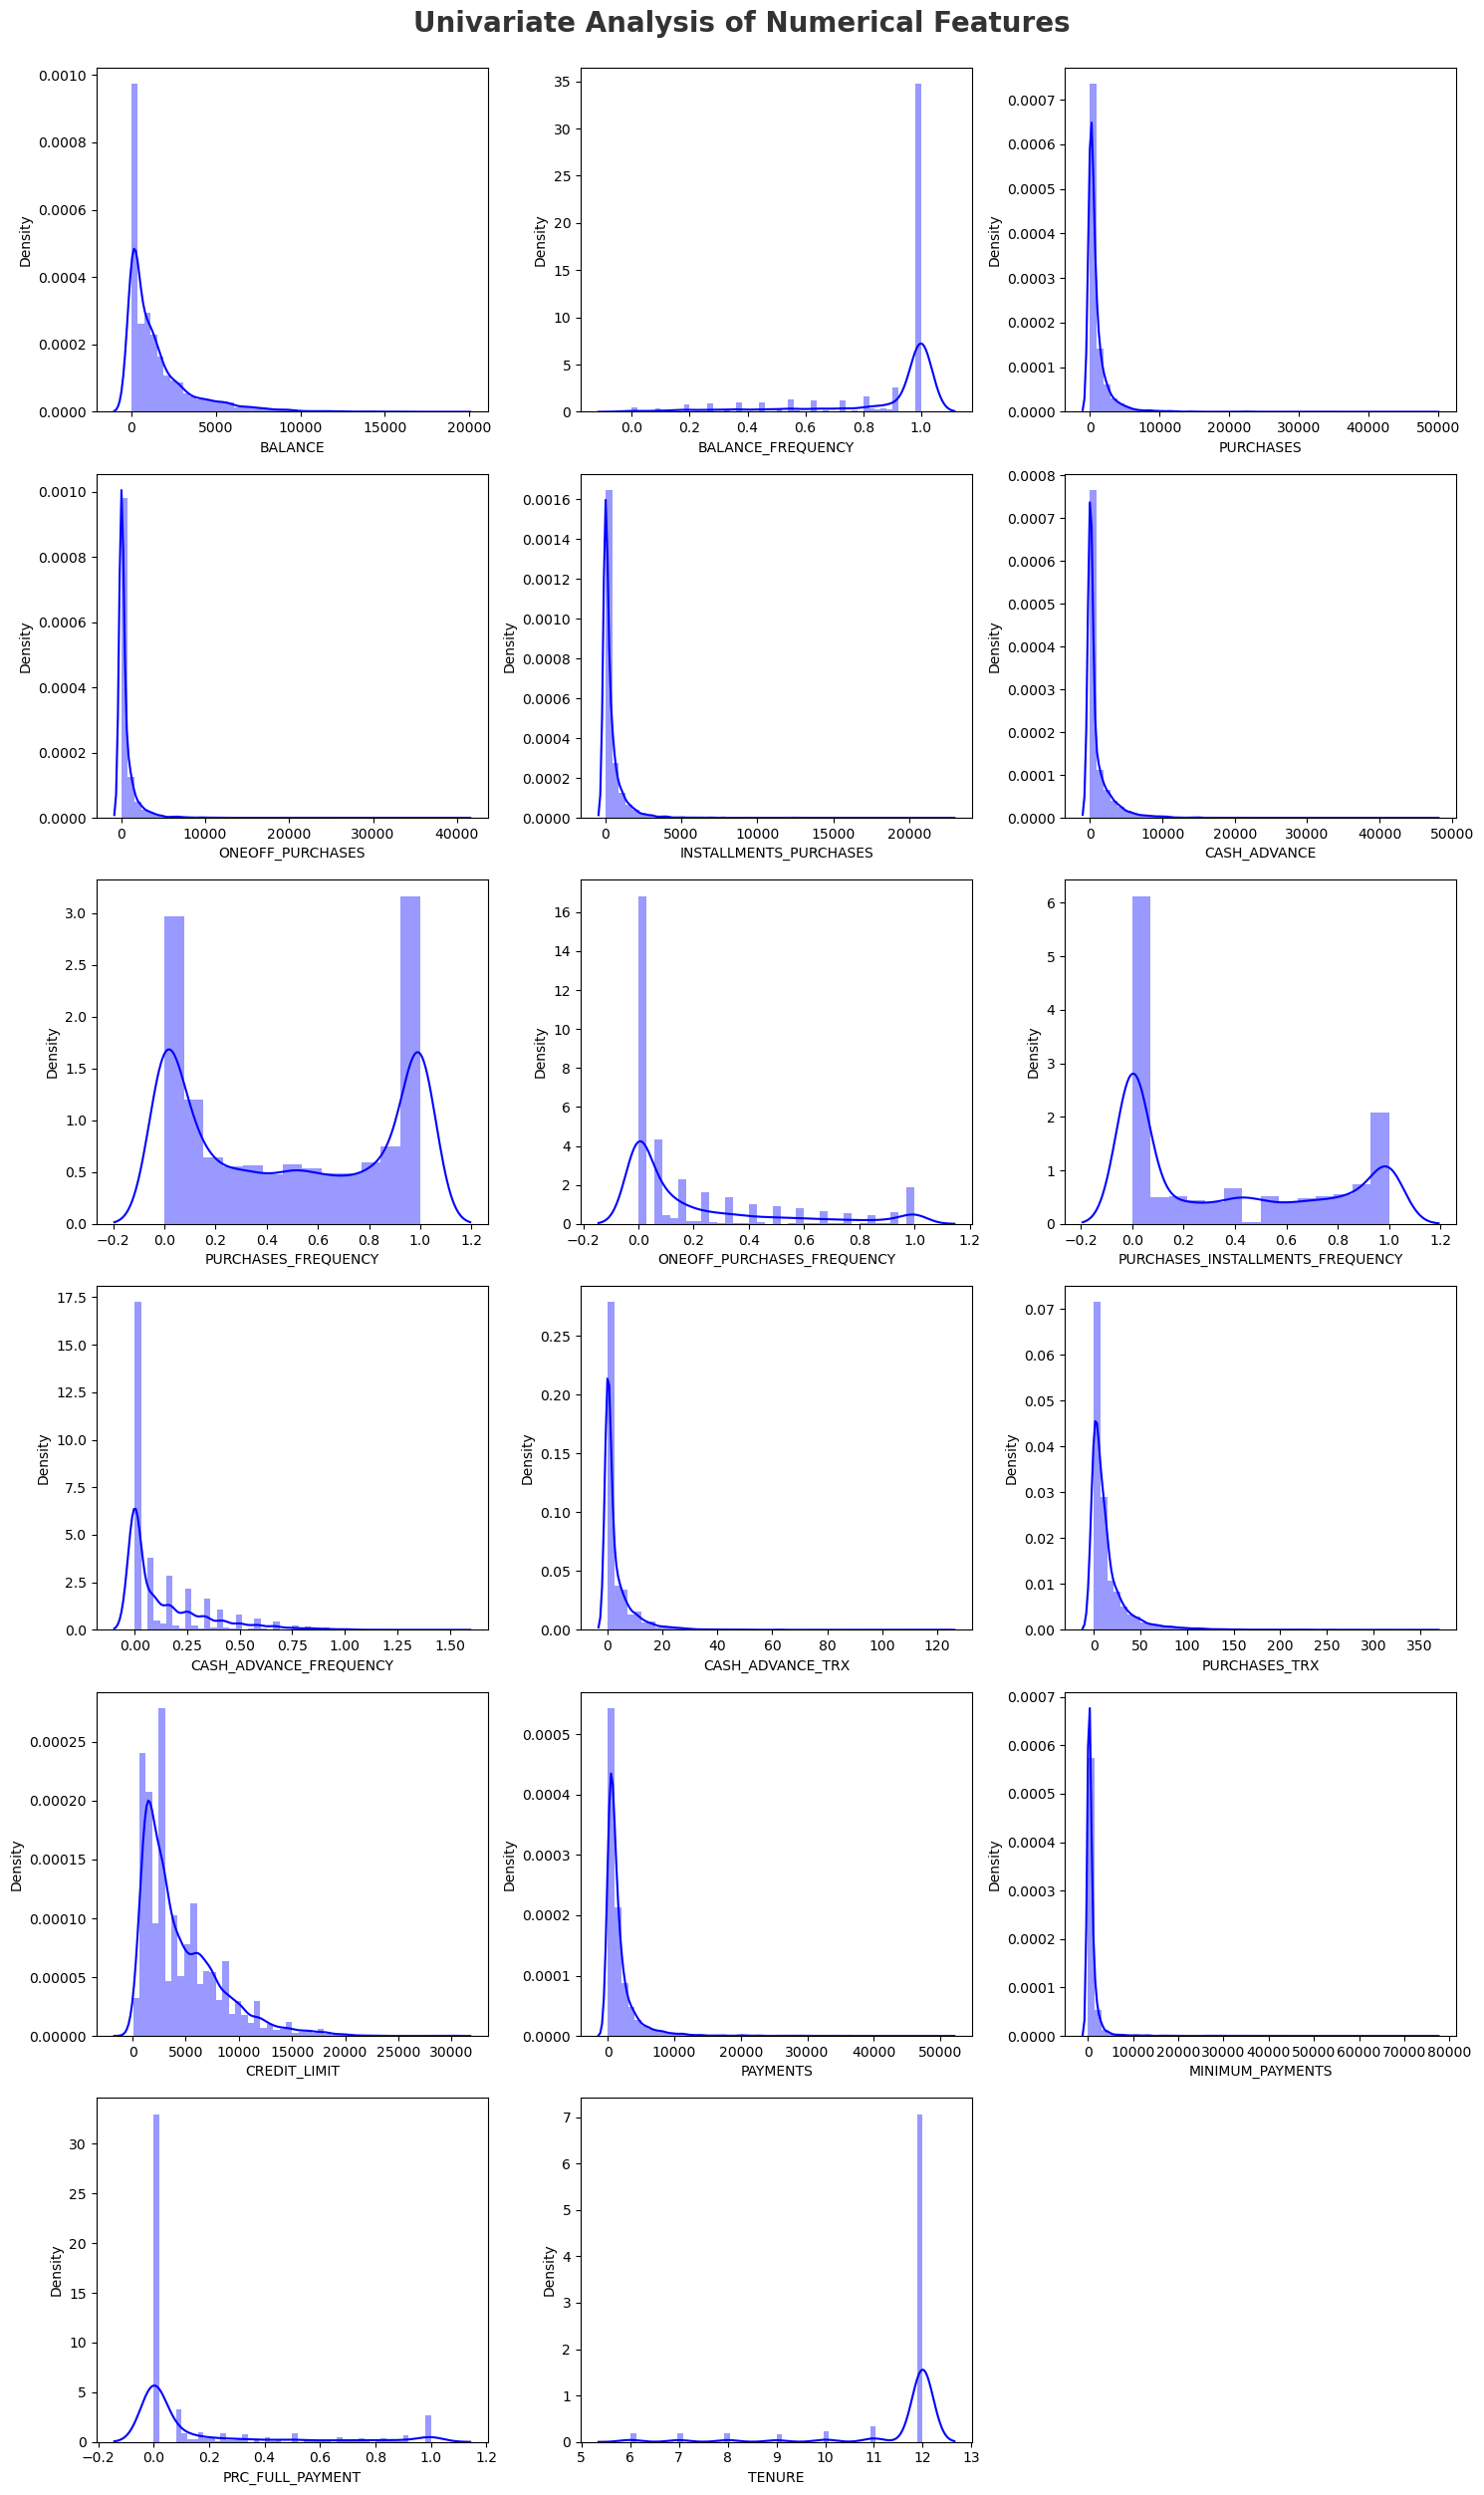

In [33]:
plt.rcParams['figure.figsize'] = (15,25)
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_feature)):
    ax= plt.subplot(6, 3, i+1)
    sns.distplot(x=df[numeric_feature[i]], color='blue', ax=ax)
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

### Check Multicollinearity in Numerical features

In [34]:
df[(list(df.columns)[1:])].corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


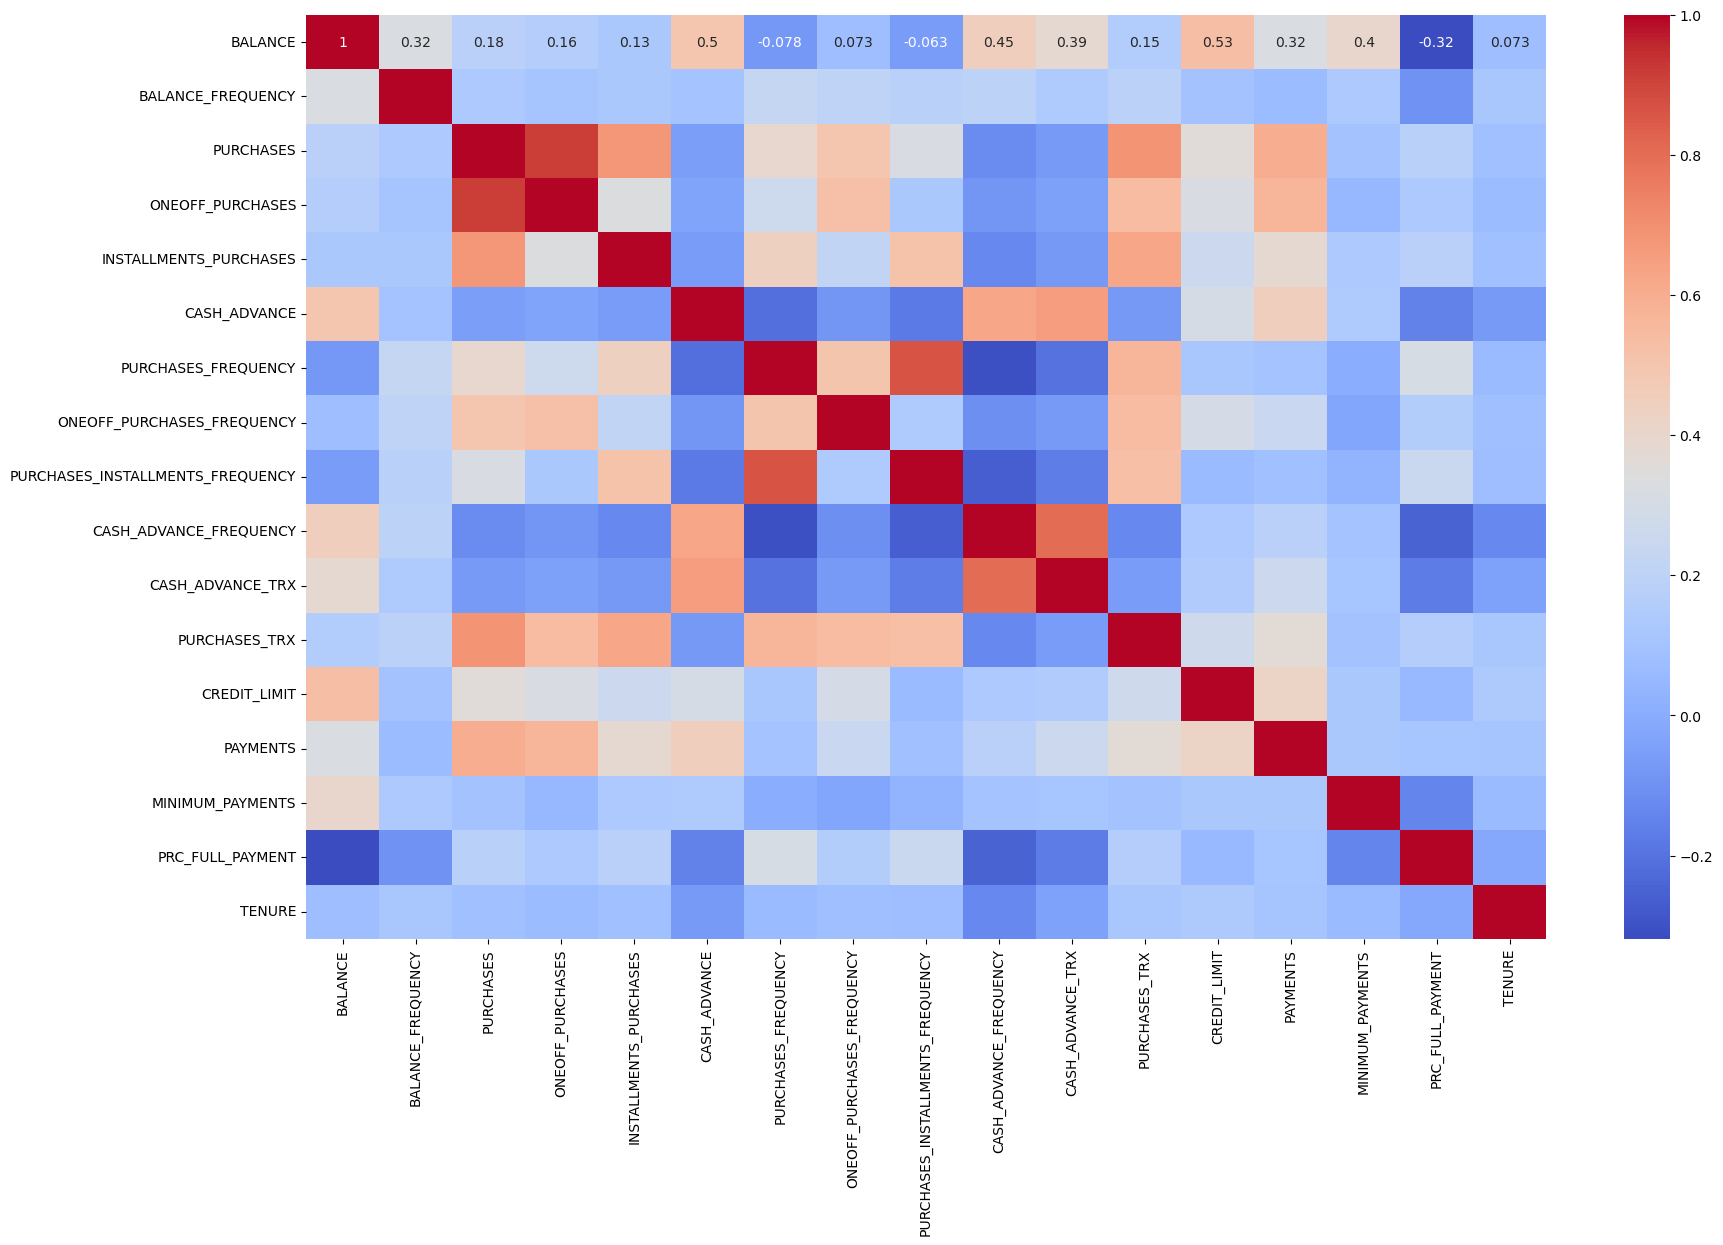

In [35]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.show()

**Report** 
* Purchases and one_off purchases are highly corrrelated.
* Other features dont have much collinearity.

In [36]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* Minimum payment column has 313 missing values.
* Credit limit has 1 missing values
* Missing values can be handled in feature engineering.

In [37]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

CREDIT_LIMIT 0.01117 % missing values
MINIMUM_PAYMENTS 3.49721 % missing values


**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MCAR type of missing values in dataset which are Missing completely at Random. 

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

In [38]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
count,8949.000000,8637.000000
mean,4494.449450,864.206542
std,3638.815725,2372.446607
min,50.000000,0.019163
25%,1600.000000,169.123707
50%,3000.000000,312.343947
75%,6500.000000,825.485459
max,30000.000000,76406.207520


In [39]:
#Minimum payments
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)
# Credit limit
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(), inplace=True)

In [40]:
df.duplicated().sum()

0

In [41]:
df.drop('CUST_ID', inplace=True, axis=1)

In [45]:
discrete_features=[feature for feature in numeric_feature if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


In [46]:
discrete_features

['TENURE']

In [48]:
continuous_features=[feature for feature in numeric_feature if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 16


In [49]:
continuous_features

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [52]:
compute_vif(numeric_feature, df)

,Variable,VIF
0,BALANCE,2.659548
1,BALANCE_FREQUENCY,1.309603
2,PURCHASES,48156.703161
3,ONEOFF_PURCHASES,29073.254792
4,INSTALLMENTS_PURCHASES,8618.756071
5,CASH_ADVANCE,2.870797
6,PURCHASES_FREQUENCY,10.797447
7,ONEOFF_PURCHASES_FREQUENCY,3.956943
8,PURCHASES_INSTALLMENTS_FREQUENCY,9.504382
9,CASH_ADVANCE_FREQUENCY,3.511863


 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 
 
**- This Dataset columns has Multi collinearity we can reduce dimension using PCA**

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

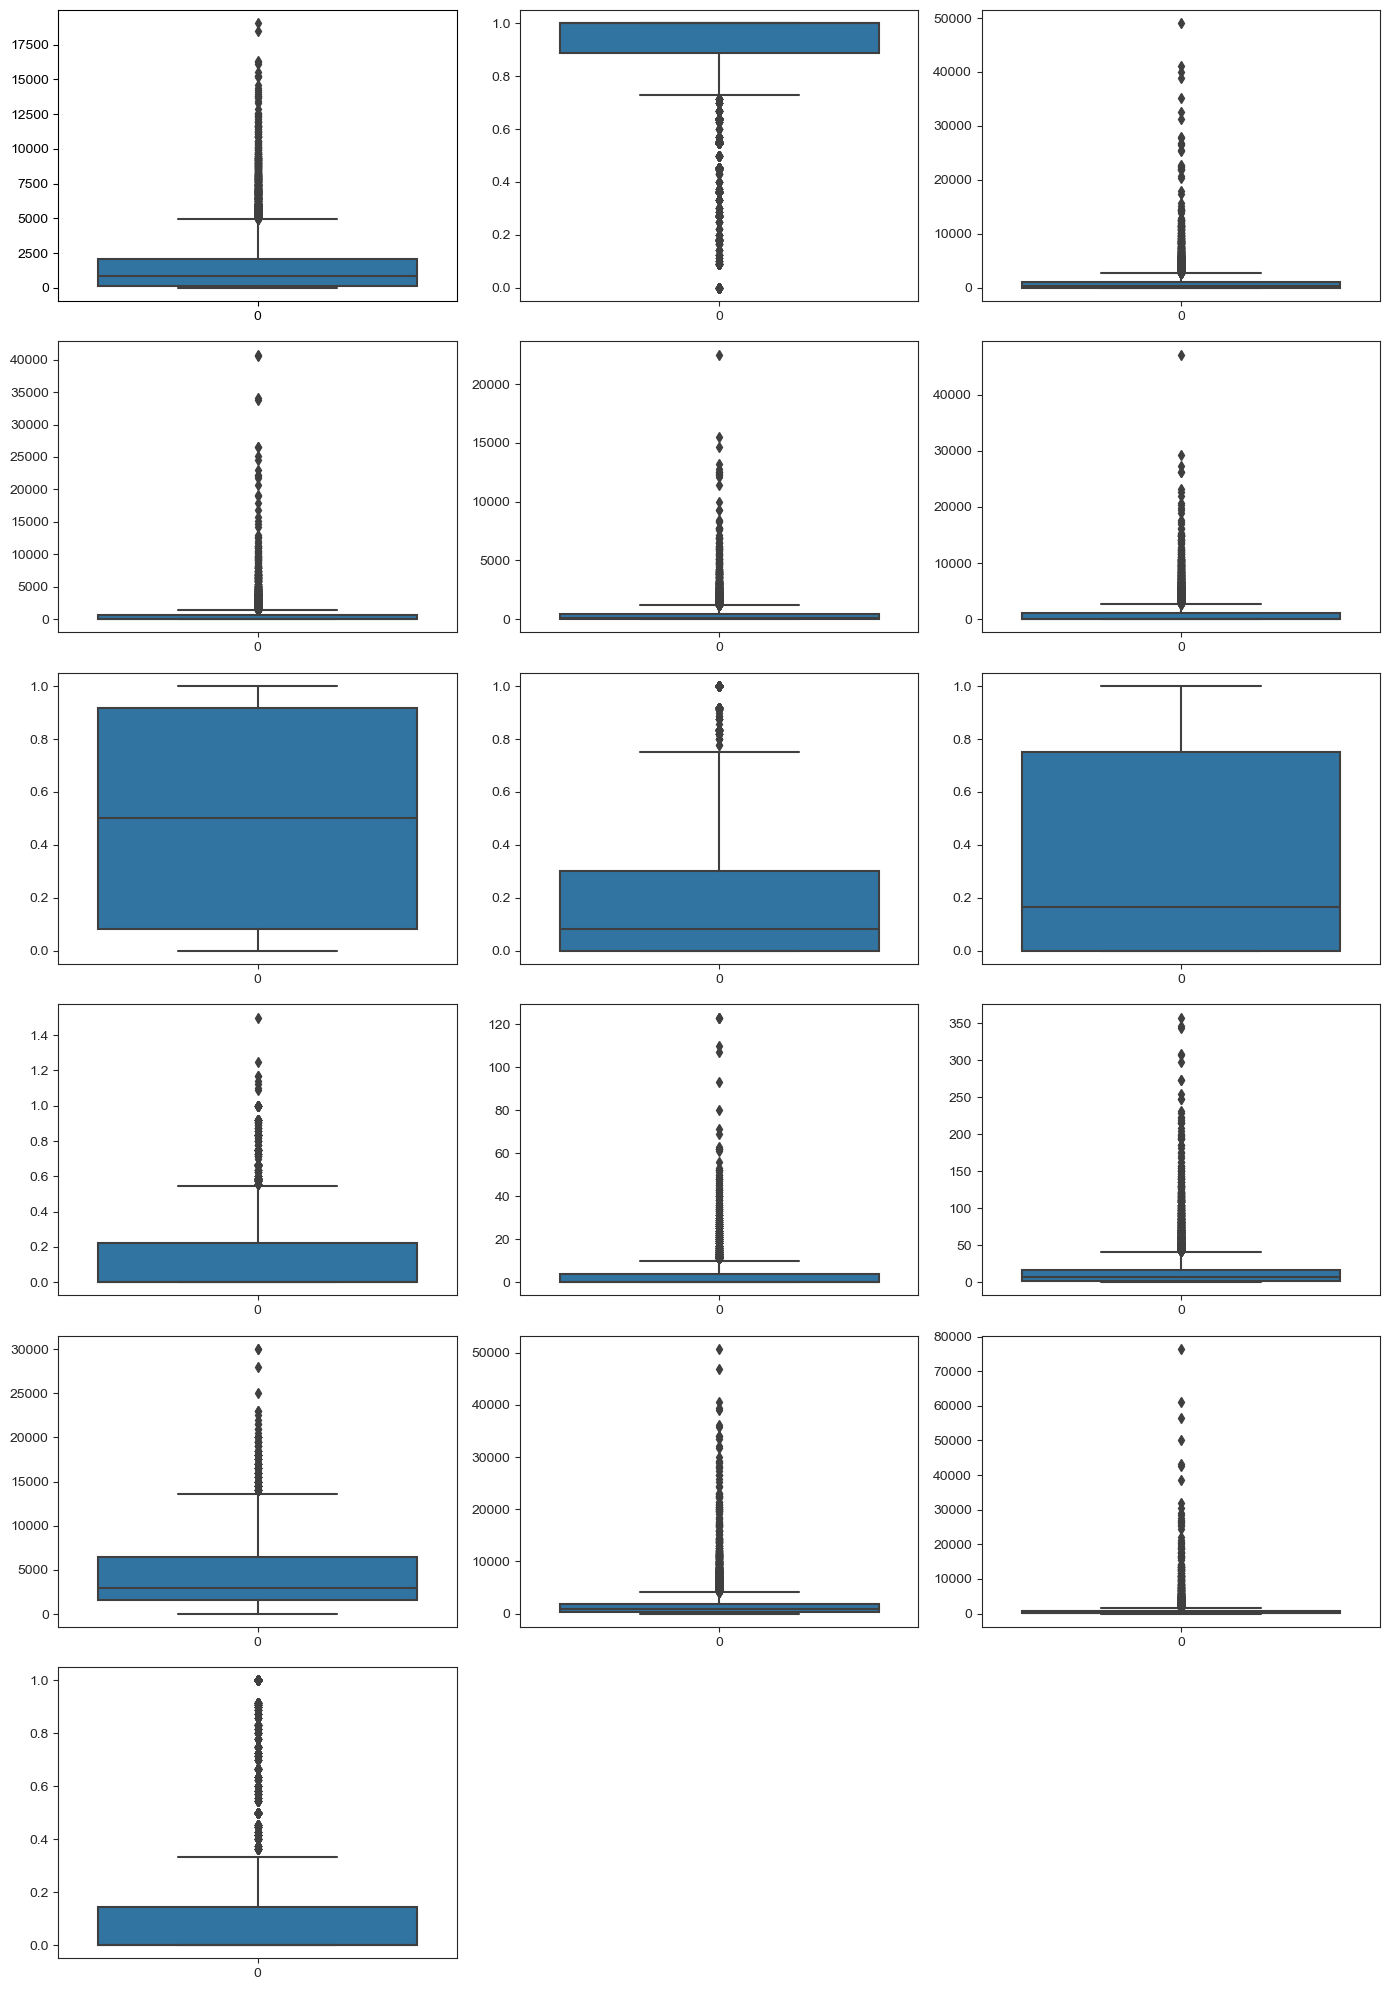

In [53]:
plt.figure(figsize=(14,20))

for i in range(len(continuous_features)):
        plt.subplot(6, 3, i+1)
        sns.set_style('ticks')
        ax = sns.boxplot(df[continuous_features[i]])
        plt.tight_layout()

In [54]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.`

In [55]:
for col in continuous_features:
          detect_outliers(col)


 #### BALANCE ####
percentile25 128.2819155
percentile75 2054.1400355
Upper limit 4942.9272155
Lower limit -2760.5052645

 #### BALANCE_FREQUENCY ####
percentile25 0.888889
percentile75 1.0
Upper limit 1.1666664999999998
Lower limit 0.7222225000000001

 #### PURCHASES ####
percentile25 39.635
percentile75 1110.13
Upper limit 2715.8725000000004
Lower limit -1566.1075000000003

 #### ONEOFF_PURCHASES ####
percentile25 0.0
percentile75 577.405
Upper limit 1443.5124999999998
Lower limit -866.1075

 #### INSTALLMENTS_PURCHASES ####
percentile25 0.0
percentile75 468.6375
Upper limit 1171.59375
Lower limit -702.95625

 #### CASH_ADVANCE ####
percentile25 0.0
percentile75 1113.8211392500002
Upper limit 2784.5528481250003
Lower limit -1670.7317088750003

 #### PURCHASES_FREQUENCY ####
percentile25 0.083333
percentile75 0.916667
Upper limit 2.166668
Lower limit -1.166668

 #### ONEOFF_PURCHASES_FREQUENCY ####
percentile25 0.0
percentile75 0.3
Upper limit 0.75
Lower limit -0.44999999999999996

 

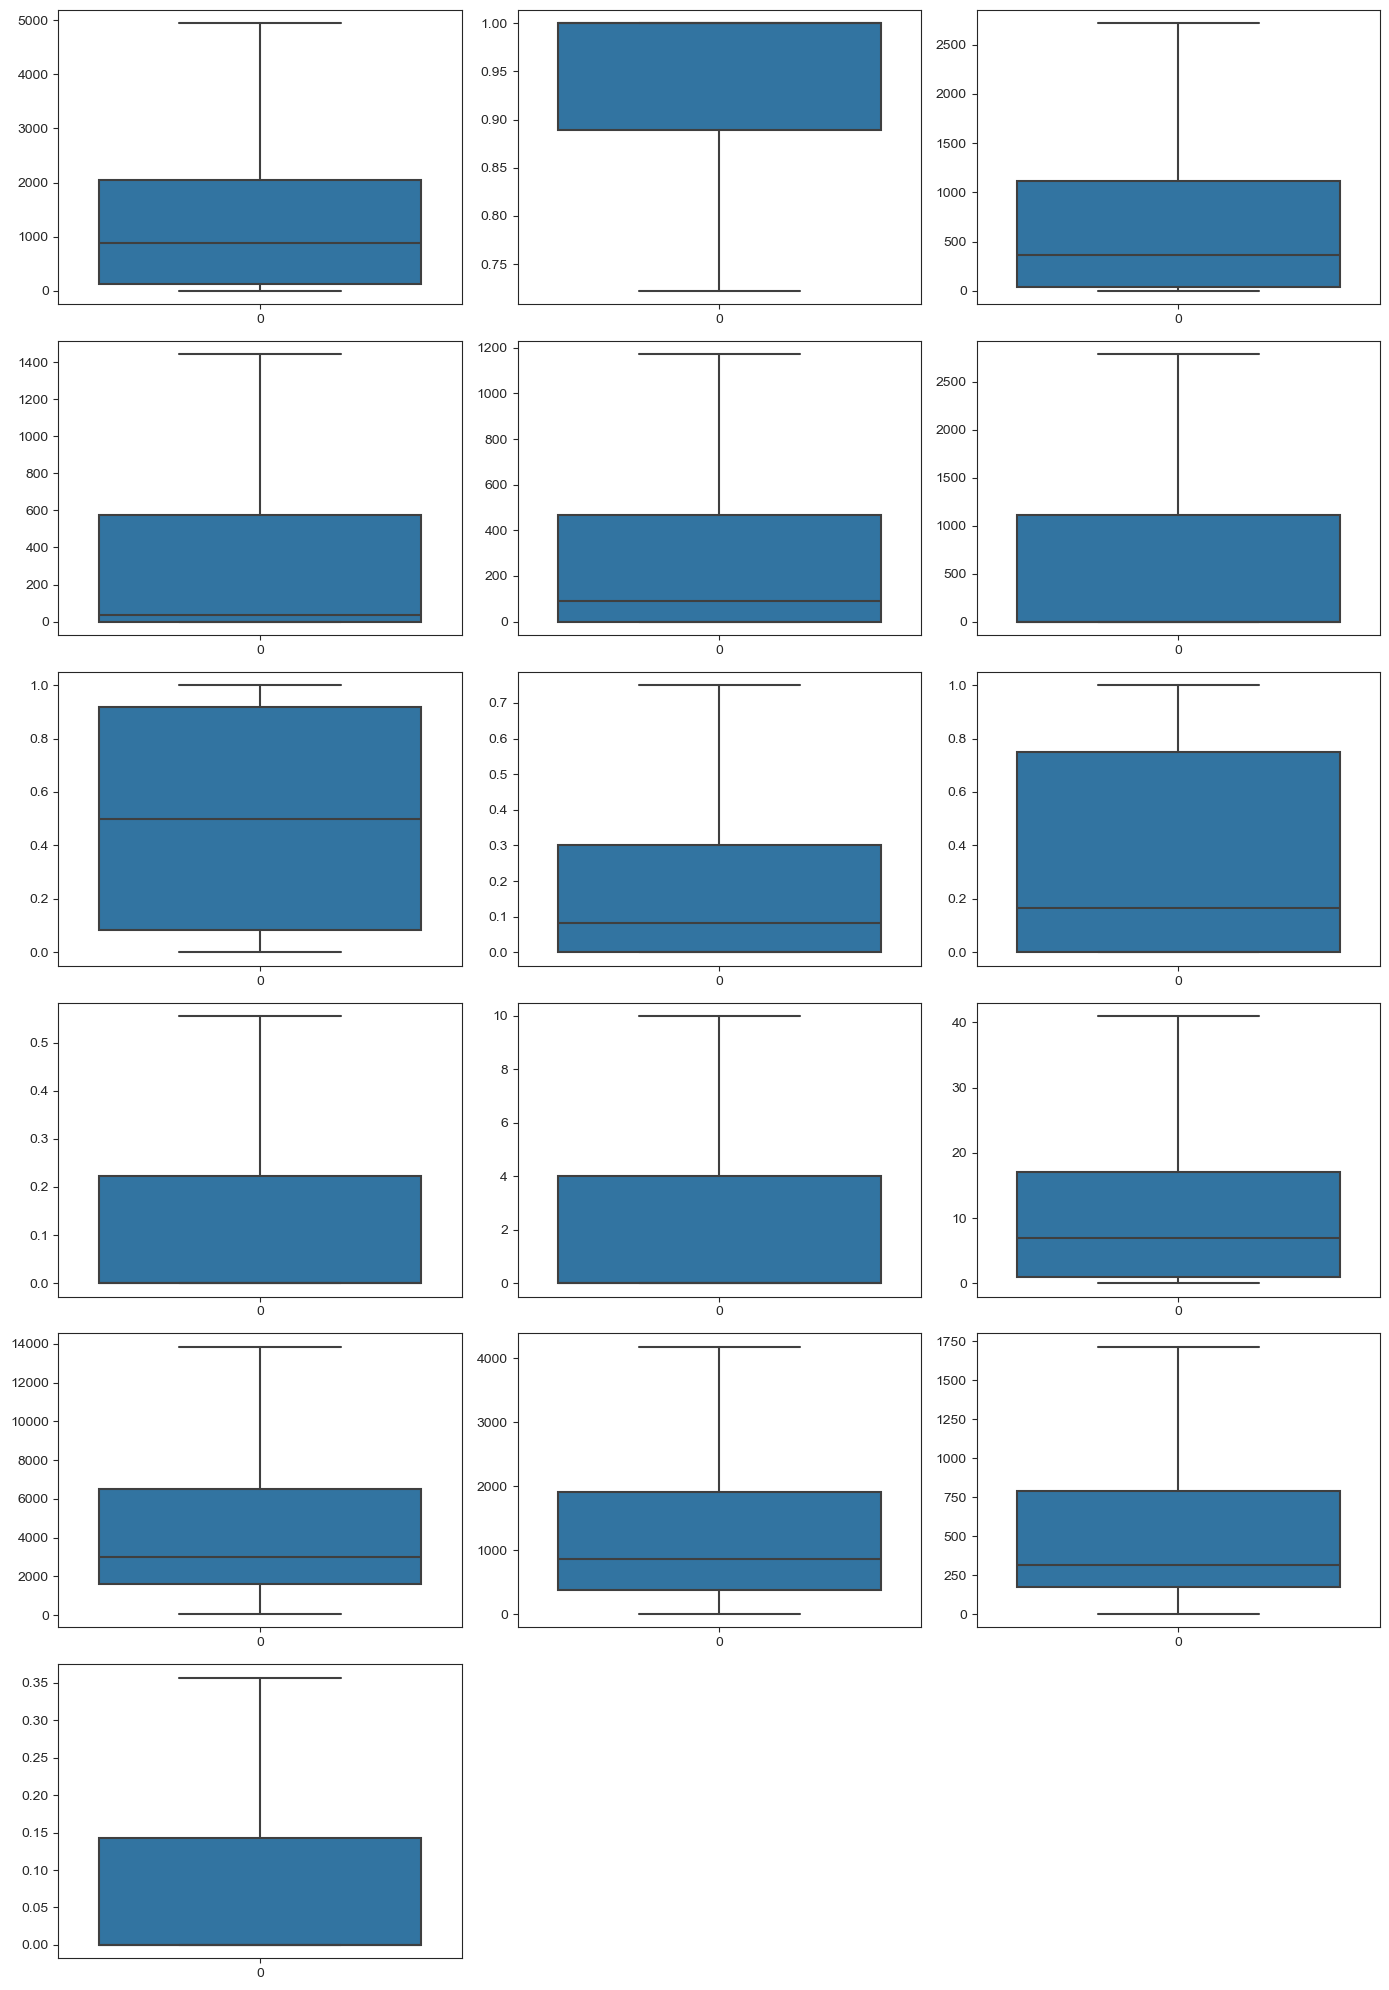

In [56]:
plt.figure(figsize=(14,20))

for i in range(len(continuous_features)):
        plt.subplot(6, 3, i+1)
        sns.set_style('ticks')
        ax = sns.boxplot(df[continuous_features[i]])
        plt.tight_layout()

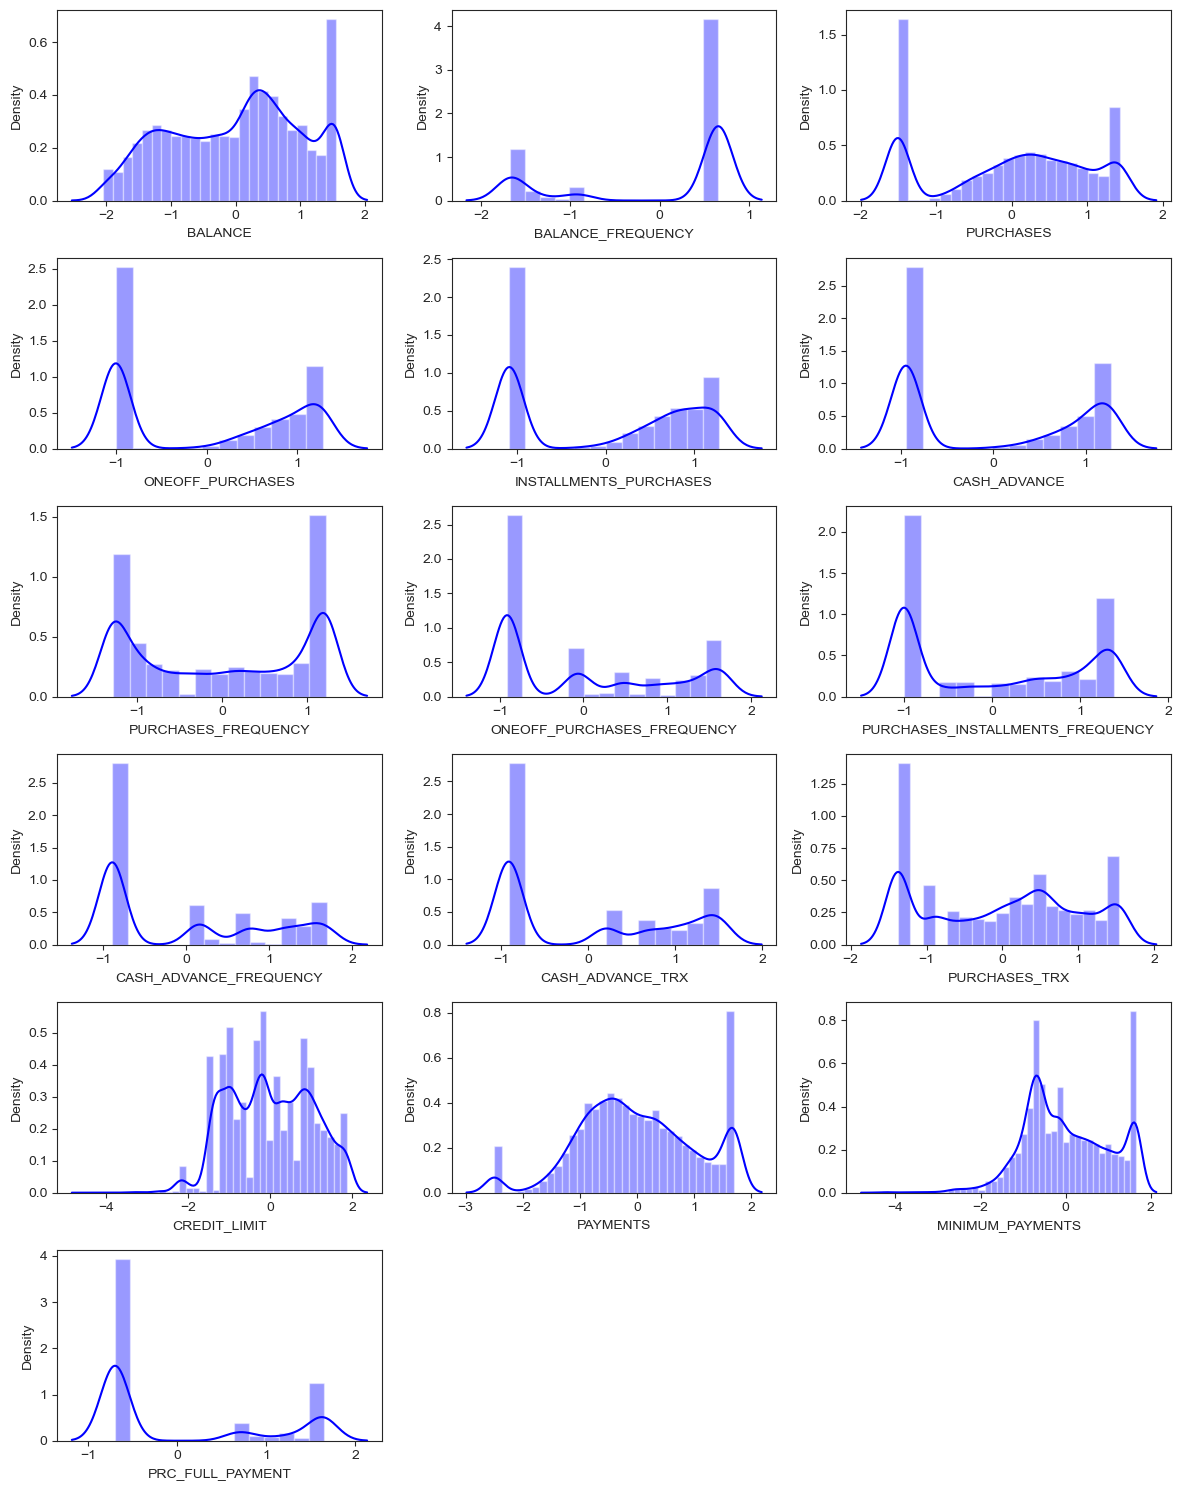

In [57]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
dfscaled = df.copy()
dfscaled[:] = PowerTransformer().fit_transform(dfscaled)
plt.figure(figsize=(12, 15))
for i in range(len(continuous_features)):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=dfscaled[continuous_features[i]], color='b')
    plt.xlabel(continuous_features[i])
    plt.tight_layout()

In [58]:
dfscaled[continuous_features].skew(axis=0, skipna=True).to_frame()

,0
BALANCE,-0.177956
BALANCE_FREQUENCY,-0.916150
PURCHASES,-0.297026
ONEOFF_PURCHASES,0.083224
INSTALLMENTS_PURCHASES,-0.054007
CASH_ADVANCE,0.171678
PURCHASES_FREQUENCY,-0.044848
ONEOFF_PURCHASES_FREQUENCY,0.504738
PURCHASES_INSTALLMENTS_FREQUENCY,0.217056
CASH_ADVANCE_FREQUENCY,0.477566


Here for Clustering Problem statement, 2Algorithms are used.
* K-Means Clustering
* DBSCAN

## PCA (Principal Component Analysis)

There is many high correlation feature so we will use some dimentinality reduction. 
We can use PCA

* Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

* Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [60]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(dfscaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [61]:
var_ratio

{2: 0.5821415419940773,
 3: 0.6829577877268345,
 4: 0.7619872795643003,
 5: 0.8304533335601848,
 6: 0.8783308048721503,
 7: 0.916419912981592,
 8: 0.9467227686741544,
 9: 0.9656662755076267,
 10: 0.9754980124393998,
 11: 0.9826272649267837,
 12: 0.9884147368363182,
 13: 0.9923424779402148,
 14: 0.9958050477885246,
 15: 0.9979745783257116,
 16: 0.9991262849671747,
 17: 1.0}

In [62]:
# this function we take it from sklearn page for ploting silhouette with little Modification 
#ploting silhouette_plot aside with clustring results in PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [63]:
# apply PCA and display clustering metrics
from sklearn.cluster import KMeans
for y in range(2, 8):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(dfscaled)
    for cluster in range(2, 7):
        x = cluster
        kmeans = KMeans(n_clusters = x,)
        label = kmeans.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '-  Inertia: ',kmeans.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4412218018540228 -  Inertia:  46805.399974969936
Silhouette-Score for 3 Clusters:  0.44221608127347595 -  Inertia:  28000.66059713674
Silhouette-Score for 4 Clusters:  0.4366738641252314 -  Inertia:  20382.558700468042
Silhouette-Score for 5 Clusters:  0.388631431150376 -  Inertia:  17102.398541402097
Silhouette-Score for 6 Clusters:  0.39915137792635225 -  Inertia:  13895.766589176737

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3783663631963713 -  Inertia:  62141.16870613038
Silhouette-Score for 3 Clusters:  0.37199019590066157 -  Inertia:  43313.23059592793
Silhouette-Score for 4 Clusters:  0.3918704466411845 -  Inertia:  34510.11878028257
Silhouette-Score for 5 Clusters:  0.40431543999760217 -  Inertia:  26786.489092633263
Silhouette-Score for 6 Clusters:  0.3637721862414867 -  Inertia:  23400.33428524098

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.3408180137785844 -  Inertia

In [64]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=2,random_state=42).fit(dfscaled)

reduced=pca_final.fit_transform(dfscaled)

In [65]:
pcadf = pd.DataFrame(reduced) 
pcadf.columns = ['PC1', 'PC2'] 
  
pcadf.head(10)

,PC1,PC2
0,0.228171,-3.320507
1,3.475161,0.879714
2,-1.301709,1.286632
3,1.332546,-0.392723
4,1.013260,-1.462602
5,-1.269259,0.430818
6,-4.248961,1.664251
7,-1.583661,-0.159666
8,-1.224464,0.207567
9,-0.636276,-1.069199


In [66]:
pca_final.explained_variance_ratio_

array([0.35805564, 0.2240859 ])

### Elbow Method to find best Clusters for K-Means
* In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.`

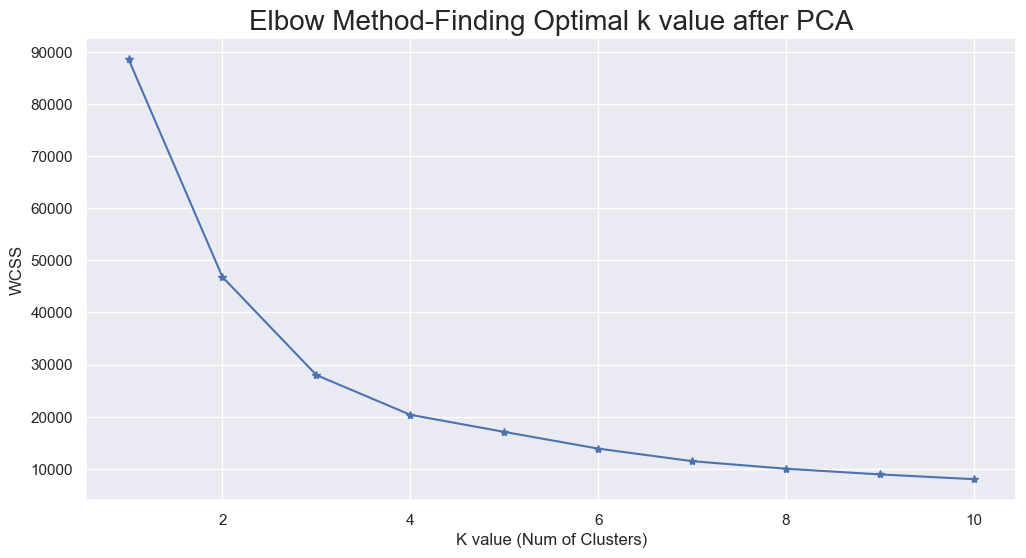

In [68]:
# model building, elbow method
wcss= {}
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11): 
    km = KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

* **Here the optimum number of cluster is 3 or 4 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.**

In [69]:
# Fitting the model to reduced data
model = KMeans(n_clusters=4).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

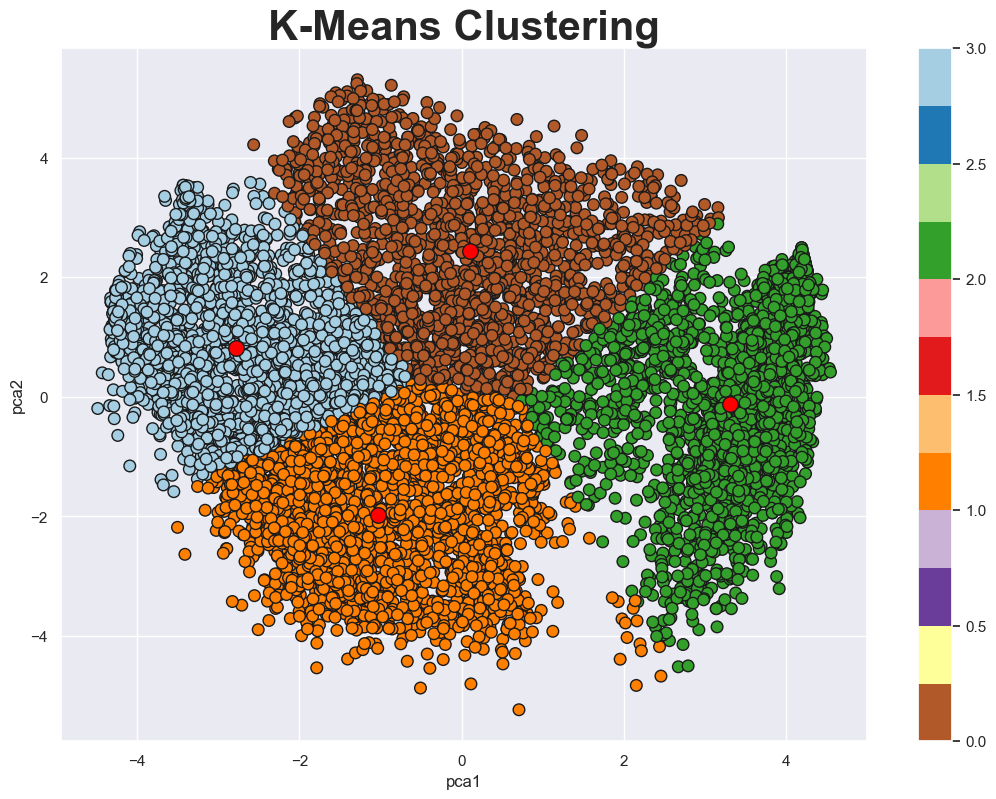

In [70]:
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k');

## DBSCAN Clustering

* Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm.
* DBSCAN algorithm group points based on distance measurement, usually the Euclidean distance and the minimum number of points. An essential property of this algorithm is that it helps us track down the outliers as the points in low-density regions; hence it is not sensitive to outliers as is the case of K-Means clustering.

**Minimum Points minPts**

In DBSCAN minPts is the minimum number of data points that should be there in the region to define the cluster. You can choose the value of minPts based on your domain knowledge. But if you lack domain knowledge a good reference point is to have minPts ≥ D + 1 where D is the dimension of the dataset.

It is recommended to keep the value for the minPts at least 3, but for larger data sets, a greater minPts value should be chosen, especially if it has many outliers.

### Finding the Optimal value of Epsilon

Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.

In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected.

The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.

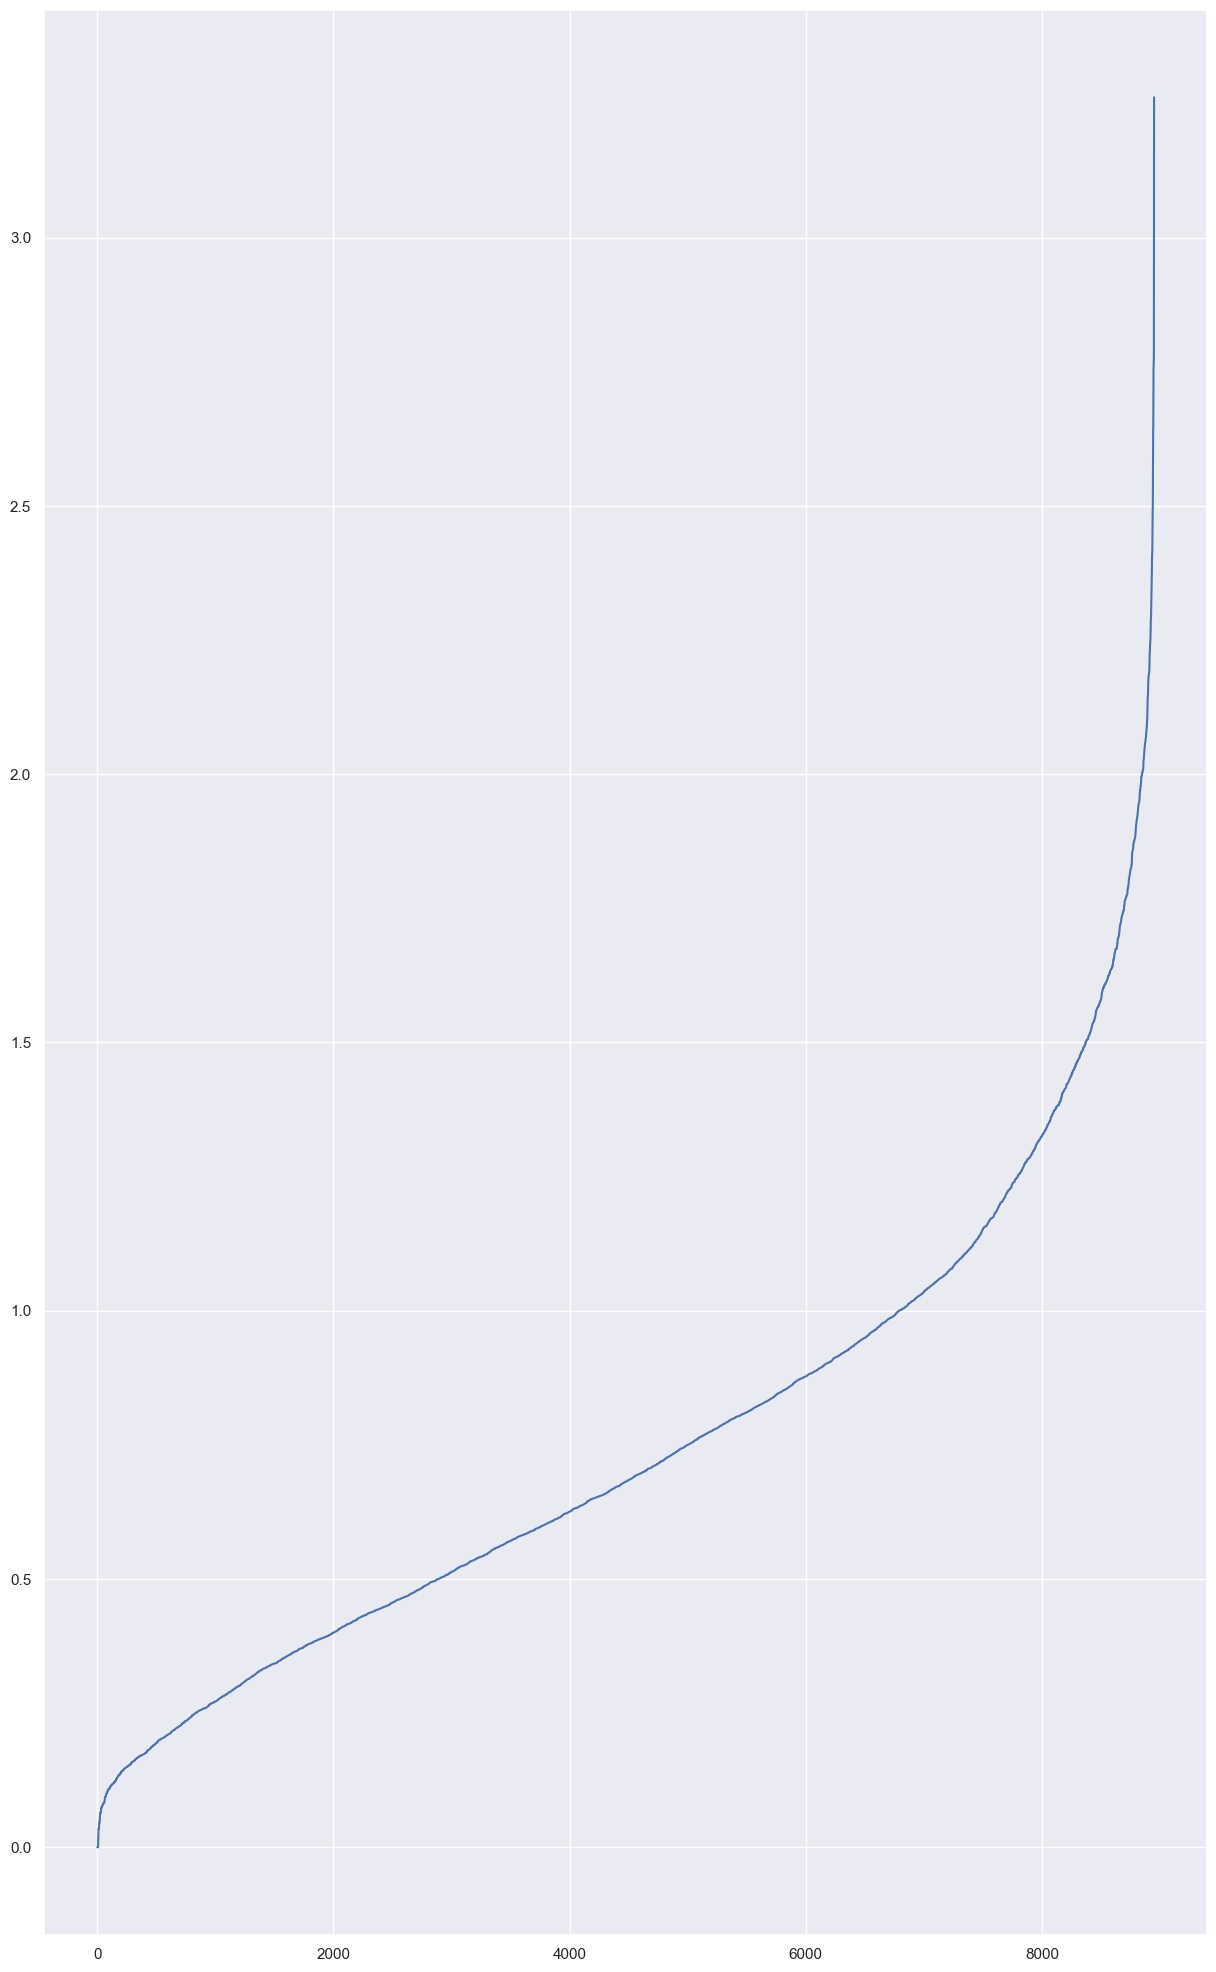

In [72]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=17)
neighbors_fit = neighbors.fit(dfscaled)
distances, indices = neighbors_fit.kneighbors(dfscaled)

distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.show()

**DBSCAN algorithm works with two parameters.**

These parameters are:

* Epsilon (Eps): This is the least distance required for two points to be termed as a neighbor. This distance is known as Epsilon (Eps). Thus we consider Eps as a threshold for considering two points as neighbors, i.e., if the distance between two points is utmost Eps, then we consider the two points to be neighbors.

* MinPoints: This refers to the minimum number of points needed to construct a cluster. We consider MinPoints as a threshold for considering a cluster as a cluster. A cluster is only recognized if the number of points is greater than or equal to the MinPts.

* **DBSCAN didn't perform well in clustering.**
* Its clear that DBSCAN does not work to well when we are dealing with clusters of varying densities or with high dimensional data
* clusters with -1 values are outliers of each clusters.

### Report
### From the above Models K means clustering has performed well with 3 and 4 clusters. if we take K-means Inertia into consideration we have choosen `n_clusters=4`.

# Final Model

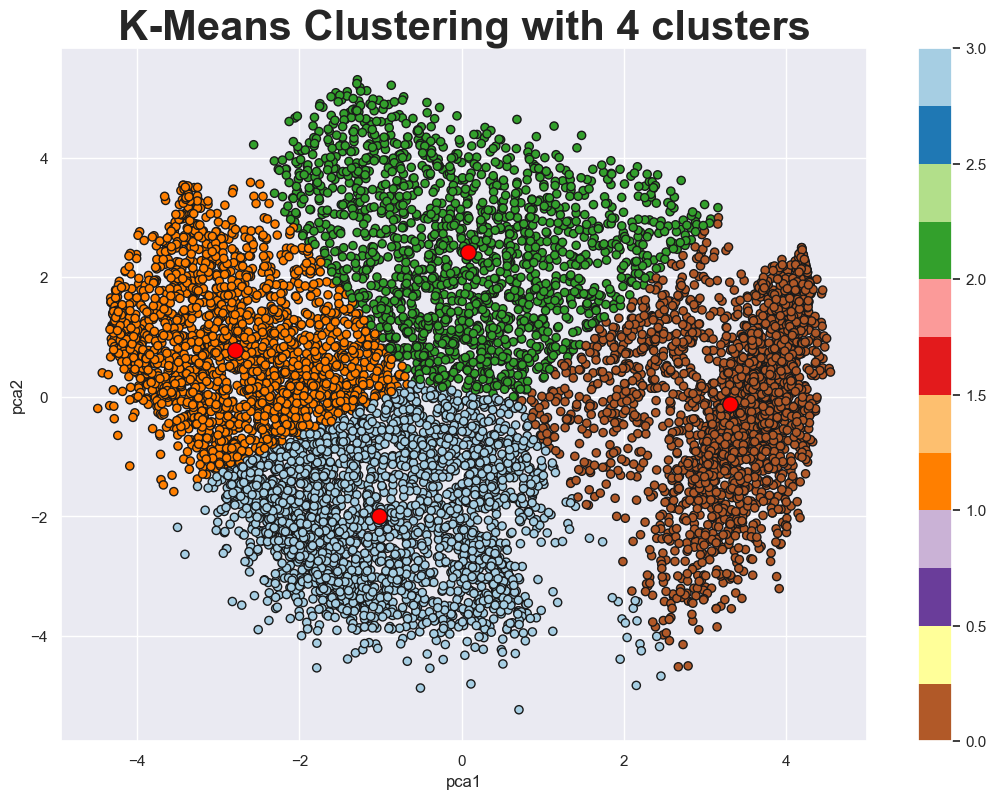

In [74]:
model = KMeans(n_clusters=4, init='k-means++').fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering with 4 clusters', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=35, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k')